# Predicting the Geographical Origin of Music

Reading the data

In [1]:
import csv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

with open('Geographical_Original_of_Music/default_features_1059_tracks.txt', newline='') as inputfile:
    data = list(csv.reader(inputfile))


In [2]:
data = np.asarray(data)
data.shape

(1059, 70)

In [3]:
X = data[:, 0:68]
y = data[:, 68:70]

print("X sample")
print(X[0, 1])
print("")
print("y sample")
print(y[0, 0:2])



X sample
7.835325

y sample
['-15.75' '-47.95']


In [4]:
y = y.astype(dtype = np.float)
print(y[0, 0:2])

[-15.75 -47.95]


## Performing KMeans based on the latitude and longitude

In [5]:
n_clusters = 33
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y)
labels = kmeans.predict(y)

#print('Centroids')
centroids = kmeans.cluster_centers_
#print(centroids)

<Figure size 432x288 with 0 Axes>

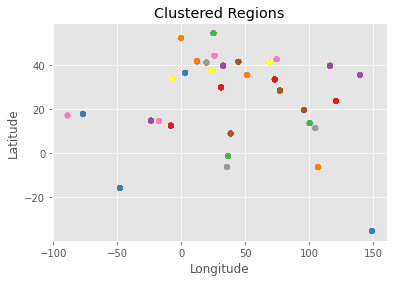

<Figure size 432x288 with 0 Axes>

In [6]:
plt.style.use('ggplot')
cmap = matplotlib.cm.get_cmap("Set1")
label_color = [cmap(float(l) /n_clusters) for l in labels]
plt.scatter(y[:, 1], y[:, 0], c = label_color, s=25)
plt.title("Clustered Regions")
plt.xlabel("Longitude") 
plt.ylabel("Latitude")

plt.figure()

## PCA: Dimensionality Reduction

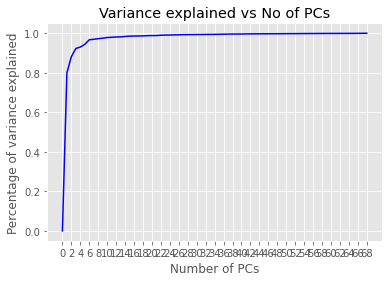

In [7]:
y = labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.8, random_state=1234)

X_scaler = StandardScaler().fit(X)
scaled_Xtrain = X_scaler.transform(Xtrain)
scaled_Xtest = X_scaler.transform(Xtest)

PCA_var = PCA(n_components = X_scaler.transform(X).shape[1])
PCA_var.fit(X_scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("Variance explained vs No of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of variance explained")
plt.plot(range(0, len(PCA_var_exp)), PCA_var_exp, c = 'b')
plt.xticks(range(0, len(PCA_var_exp),2))
plt.show()

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [9]:
df = pd.read_csv('Geographical_Original_of_Music_2/default_features_1059_tracks.txt', delimiter=",", header=None)
X =  df.iloc[: , :-2]
scaler = StandardScaler().fit(X)
scaled_x = scaler.transform(X)
PCA_model = PCA()
PCA_model.fit(scaled_x)
PCA_model.explained_variance_

array([1.36077800e+01, 8.06754586e+00, 5.24429095e+00, 4.76379249e+00,
       3.80692885e+00, 2.25729380e+00, 2.08743968e+00, 1.87124193e+00,
       1.71542344e+00, 1.47998707e+00, 1.39744044e+00, 1.30391545e+00,
       1.25639373e+00, 1.11418190e+00, 1.00637734e+00, 9.74530152e-01,
       9.43811507e-01, 9.24755813e-01, 8.44880127e-01, 8.11008679e-01,
       7.95693284e-01, 6.97264438e-01, 6.35197549e-01, 6.17673459e-01,
       5.72783377e-01, 5.37443007e-01, 4.95478861e-01, 4.83081255e-01,
       4.68140561e-01, 4.51469848e-01, 4.41163005e-01, 4.19257570e-01,
       4.03422960e-01, 3.94863860e-01, 3.58708876e-01, 3.35795677e-01,
       3.10574342e-01, 2.85489037e-01, 2.81856614e-01, 2.70607700e-01,
       2.41042978e-01, 2.19330328e-01, 2.06895527e-01, 2.01248740e-01,
       1.92182308e-01, 1.84603849e-01, 1.76550525e-01, 1.73357458e-01,
       1.61881025e-01, 1.49516595e-01, 1.40901317e-01, 1.38934176e-01,
       1.24549042e-01, 1.12743666e-01, 1.06099826e-01, 1.01420060e-01,
      

## 6 Principal Components explain Maximum Variance

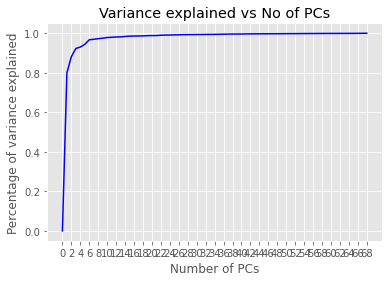

In [10]:
PCA_var = PCA(n_components = scaler.transform(X).shape[1])
PCA_var.fit(scaler.transform(X))
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("Variance explained vs No of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Percentage of variance explained")
plt.plot(range(0, len(PCA_var_exp)), PCA_var_exp, c = 'b')
plt.xticks(range(0, len(PCA_var_exp),2))
plt.show()

## Performing PCA and getting the Principal Components

In [11]:
pca = PCA(n_components = 6)
pca.fit(scaled_x)
sources_pca = pca.transform(scaled_x)
sources_pca

array([[-1.06872541,  8.43727656,  5.19723273,  8.03161496,  5.96168484,
         1.25147136],
       [ 0.19052799,  0.86266258,  0.07284819,  2.82587678, -0.6487743 ,
        -0.94247094],
       [ 4.14991826, -1.39798881, -2.09978302,  0.74588331, -2.96262779,
         0.92277716],
       ...,
       [-3.00006574, -1.80171558, -0.67360229, -0.141599  , -0.4135666 ,
        -0.88082385],
       [ 1.14937162,  0.4368299 ,  1.98790139, -4.57903817,  1.23593476,
         2.58653938],
       [17.07445978, -3.12186229, -3.30924448, -1.05286599,  0.99293295,
         3.2258708 ]])

## Determining the optimal number of clusters for K-Means

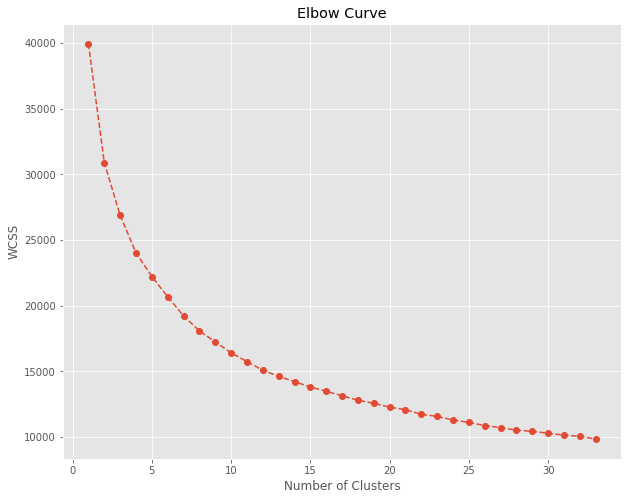

In [12]:
wcss = []
for i in range(1, 34):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 55)
    kmeans_pca.fit(sources_pca)
    wcss.append(kmeans_pca.inertia_)
    
plt.figure(figsize = (10,8))
plt.plot(range(1,34), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [13]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 55)
kmeans_pca.fit(sources_pca)

KMeans(n_clusters=4, random_state=55)

## Mapping the latitude and longitude to Country names

In [14]:
#df1 = pd.read_csv('Geographical_Original_of_Music_2/default_features_1059_tracks.txt', delimiter=",", header=None)
#lat_lon = df1.groupby([68,69]).size().reset_index().rename(columns={0:'count'})
#lat_lon.to_csv('lat_long.csv') 

df_lat_lon = pd.read_csv('Geographical_Original_of_Music_2/lat_long.csv')
#df.head()
df_countries = pd.merge(df, df_lat_lon,  how='left', left_on=[68,69], right_on = ['lat','long'])
df_countries.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,lat,long,country,continent,region
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.668840,-0.914772,-0.836250,-15.75,-47.95,-15.75,-47.95,Brazil,Americas,S America
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,1.088478,-0.123595,1.391141,14.91,-23.51,14.91,-23.51,Cape Verde,Africa,W Africa
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,2.081069,1.375763,1.063847,12.65,-8.00,12.65,-8.00,Mali,Africa,W Africa
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.385005,-0.012326,-0.392197,9.03,38.74,9.03,38.74,Ethiopia,Africa,E Africa
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.119658,0.271838,1.289783,34.03,-6.85,34.03,-6.85,Morocco,Africa,N Africa


In [15]:

df_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(sources_pca, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'] )], axis = 1)
df_pca_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.914772,-0.836250,-15.75,-47.95,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.123595,1.391141,14.91,-23.51,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,1.375763,1.063847,12.65,-8.00,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.012326,-0.392197,9.03,38.74,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.271838,1.289783,34.03,-6.85,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588


In [16]:
df_pca_kmeans['Segment K Means'] = kmeans_pca.labels_
df_pca_kmeans.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.836250,-15.75,-47.95,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,1.391141,14.91,-23.51,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,1
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,1.063847,12.65,-8.00,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,2
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.392197,9.03,38.74,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,1
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.289783,34.03,-6.85,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,3


In [17]:
df_pca_kmeans['Cluster'] = df_pca_kmeans['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})

In [18]:
df_pca_kmeans_country = pd.concat([df_pca_kmeans, df_countries['country']], axis = 1)
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,1,second,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,1,second,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,2,third,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,1,second,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,3,fourth,Morocco


## K-Means with clusters=4

/Users/kaavyagowthaman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


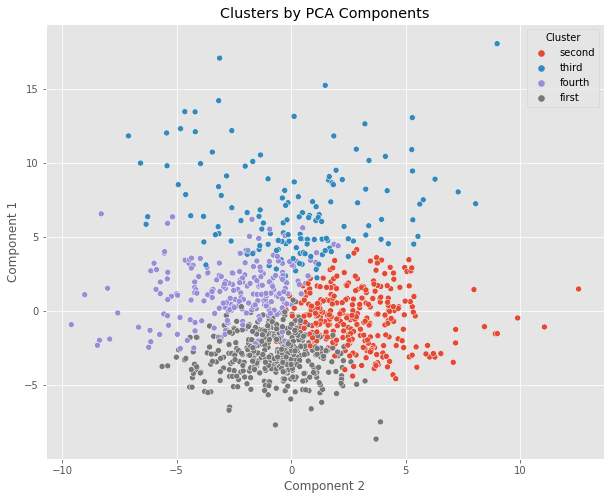

In [20]:
import seaborn as sns
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans_country['Cluster'])
plt.title('Clusters by PCA Components')
plt.show()

### Percentage of songs from each country that belong to a cluster (clusters = 4)

In [21]:
def get_clusters(df_pca_kmeans_country):
    clusters = {}
    countries = {}
    for index, row in df_pca_kmeans_country.iterrows():
        if row['Cluster'] not in clusters:
            clusters[row['Cluster']] = {}
        if row['country'] in clusters[row['Cluster']]:
            clusters[row['Cluster']][row['country']] += 1
        else:
            clusters[row['Cluster']][row['country']] = 1
        #getting total country counts
        if row['country'] in countries:
            countries[row['country']] += 1
        else:
            countries[row['country']] = 1

    for key in clusters:
        print("-----------")
        print(key)
        print("-----------")
        for k in clusters[key]:
            print(k, " ", round(((clusters[key][k])/countries[k]),2))
get_clusters(df_pca_kmeans_country)

-----------
second
-----------
Brazil   0.5
Cape Verde   0.41
Ethiopia   0.2
Mali   0.7
Senegal   0.58
Uzbekistan   0.28
India   0.28
Romania   0.26
Algeria   0.57
Turkey   0.19
China   0.25
Jamaica   0.91
Egypt   0.39
Italy   0.12
Australia   0.57
Japan   0.37
Belize   0.27
Tanzania   0.5
Morocco   0.12
Cambodia   0.14
Myanmar   0.08
Indonesia   0.32
Kenya   0.38
Iran   0.13
Albania   0.14
Thailand   0.19
Pakistan   0.17
United Kingdom   0.15
Kyrgyzstan   0.04
-----------
third
-----------
Mali   0.17
Lithuania   0.28
Romania   0.37
Myanmar   0.92
Thailand   0.37
Indonesia   0.32
Kenya   0.22
Iran   0.13
Australia   0.07
Japan   0.11
Georgia   0.07
Cambodia   0.71
Uzbekistan   0.06
China   0.3
Pakistan   0.02
Turkey   0.06
Greece   0.15
Cape Verde   0.06
Ethiopia   0.07
India   0.07
Senegal   0.12
Italy   0.02
Morocco   0.06
Egypt   0.06
Albania   0.14
Brazil   0.03
Tanzania   0.15
Kyrgyzstan   0.04
-----------
fourth
-----------
Morocco   0.21
United Kingdom   0.79
Romania   0.11
Tha

## K-Means with clusters = 3

In [22]:
kmeans_pca_3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 55)
kmeans_pca_3.fit(sources_pca)
df_pca_kmeans_country['Segment K Means'] = kmeans_pca_3.labels_
df_pca_kmeans_country['Cluster'] = df_pca_kmeans_country['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,2,third,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,2,third,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,1,second,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,2,third,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,0,first,Morocco


### Percentage of songs from each country that belong to a cluster (clusters = 3)

In [23]:
get_clusters(df_pca_kmeans_country)

-----------
third
-----------
Brazil   0.53
Cape Verde   0.53
Ethiopia   0.3
Mali   0.73
Senegal   0.62
Uzbekistan   0.33
Italy   0.18
India   0.28
Romania   0.16
Algeria   0.66
Turkey   0.22
China   0.3
Jamaica   0.91
Pakistan   0.17
Egypt   0.45
Belize   0.55
Australia   0.64
Japan   0.47
Tanzania   0.55
Morocco   0.27
United Kingdom   0.15
Cambodia   0.14
Myanmar   0.08
Indonesia   0.36
Kenya   0.41
Iran   0.17
Albania   0.29
Thailand   0.19
Kyrgyzstan   0.08
Greece   0.02
Lithuania   0.03
-----------
second
-----------
Mali   0.17
Lithuania   0.62
Romania   0.42
United Kingdom   0.18
Myanmar   0.92
Thailand   0.48
Indonesia   0.36
Kenya   0.22
Iran   0.17
Italy   0.16
Cape Verde   0.09
Australia   0.07
Japan   0.26
Georgia   0.21
Cambodia   0.86
Uzbekistan   0.06
Ethiopia   0.13
China   0.35
Pakistan   0.06
Turkey   0.06
Albania   0.24
Greece   0.22
Tanzania   0.25
Taiwan   0.12
India   0.1
Kyrgyzstan   0.19
Senegal   0.12
Egypt   0.13
Morocco   0.12
Brazil   0.06
Algeria   0.03
--

## K-Means with clusters = 2

In [24]:
kmeans_pca_2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 55)
kmeans_pca_2.fit(sources_pca)
df_pca_kmeans_country['Segment K Means'] = kmeans_pca_2.labels_
df_pca_kmeans_country['Cluster'] = df_pca_kmeans_country['Segment K Means'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth'})
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,69,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-47.95,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,0,first,Brazil
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-23.51,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,0,first,Cape Verde
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-8.00,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,1,second,Mali
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,38.74,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,0,first,Ethiopia
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-6.85,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,0,first,Morocco


### Percentage of songs from each country that belong to a cluster (clusters = 2)

In [25]:
get_clusters(df_pca_kmeans_country)

-----------
first
-----------
Brazil   0.83
Cape Verde   0.71
Ethiopia   0.87
Morocco   0.79
Mali   0.76
Senegal   0.79
United Kingdom   0.48
Uzbekistan   0.92
Italy   0.71
India   0.84
Pakistan   0.83
Romania   0.53
Algeria   0.89
Turkey   0.89
China   0.6
Taiwan   0.36
Indonesia   0.64
Jamaica   0.64
Iran   0.83
Kyrgyzstan   0.73
Belize   1.0
Kenya   0.78
Greece   0.76
Australia   0.79
Japan   0.68
Tanzania   0.6
Georgia   0.48
Cambodia   0.07
Egypt   0.74
Albania   0.43
Thailand   0.41
Lithuania   0.25
Myanmar   0.04
-----------
second
-----------
Mali   0.24
Uzbekistan   0.08
Lithuania   0.75
Romania   0.47
United Kingdom   0.52
Myanmar   0.96
Thailand   0.59
Taiwan   0.64
Indonesia   0.36
Jamaica   0.36
Pakistan   0.17
Egypt   0.26
Kyrgyzstan   0.27
Kenya   0.22
Iran   0.17
Italy   0.29
Brazil   0.17
Cape Verde   0.29
Australia   0.21
Japan   0.32
Georgia   0.52
Cambodia   0.93
India   0.16
Ethiopia   0.13
China   0.4
Turkey   0.11
Albania   0.57
Greece   0.24
Tanzania   0.4
Moroc

## Performing DBSCAN

Text(0.5, 1.0, 'DBSCAN')

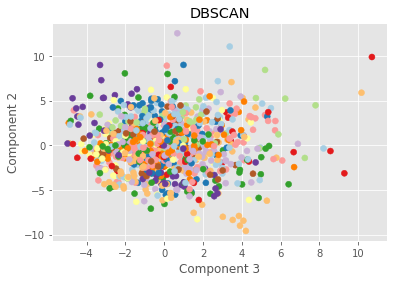

In [26]:
x_axis = df_pca_kmeans_country['Component 3']
y_axis = df_pca_kmeans_country['Component 2']
plt.xlabel("Component 3")
plt.ylabel("Component 2")
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.title("DBSCAN")

## Clustering using DBSCAN eps = 2, min_samples = 3

Text(0.5, 1.0, 'DBSCAN')

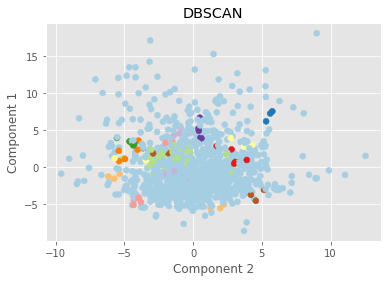

In [27]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 2, min_samples = 3)
db_default.fit(sources_pca)
labels = db_default.labels_
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']

 
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.xlabel("Component 2")
plt.ylabel("Component 1")
plt.title("DBSCAN")

In [28]:
df_pca_kmeans_country['Cluster_DBSCAN'] = labels
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country,Cluster_DBSCAN
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,0,first,Brazil,-1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,0,first,Cape Verde,0
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,1,second,Mali,-1
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,0,first,Ethiopia,-1
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,0,first,Morocco,0


### Percentage of songs that belong to each cluster

In [29]:
def get_clusters_dbscan(df_pca_kmeans_country):
    clusters = {}
    countries = {}
    for index, row in df_pca_kmeans_country.iterrows():
        if row['Cluster_DBSCAN'] not in clusters:
            clusters[row['Cluster_DBSCAN']] = {}
        if row['country'] in clusters[row['Cluster_DBSCAN']]:
            clusters[row['Cluster_DBSCAN']][row['country']] += 1
        else:
            clusters[row['Cluster_DBSCAN']][row['country']] = 1
        #getting total country counts
        if row['country'] in countries:
            countries[row['country']] += 1
        else:
            countries[row['country']] = 1

    for key in clusters:
        print("-----------")
        print(key)
        print("-----------")
        for k in clusters[key]:
            print(k, " ", round(((clusters[key][k])/countries[k]),2))
get_clusters_dbscan(df_pca_kmeans_country)

-----------
-1
-----------
Brazil   0.36
Mali   0.39
Ethiopia   0.27
Uzbekistan   0.31
India   0.33
Lithuania   0.62
Romania   0.42
United Kingdom   0.64
Algeria   0.34
Turkey   0.22
Myanmar   0.8
Thailand   0.63
China   0.68
Taiwan   0.2
Indonesia   0.72
Pakistan   0.3
Egypt   0.32
Kyrgyzstan   0.31
Kenya   0.25
Iran   0.57
Belize   0.55
Italy   0.35
Cape Verde   0.32
Australia   0.71
Japan   0.53
Georgia   0.52
Cambodia   0.64
Jamaica   0.14
Senegal   0.42
Albania   0.48
Greece   0.15
Morocco   0.24
Tanzania   0.25
-----------
0
-----------
Cape Verde   0.65
Morocco   0.67
Mali   0.58
Senegal   0.46
United Kingdom   0.09
Uzbekistan   0.69
Italy   0.51
Pakistan   0.64
Romania   0.58
Algeria   0.57
Turkey   0.77
China   0.33
Indonesia   0.28
Jamaica   0.82
Iran   0.43
India   0.58
Kyrgyzstan   0.69
Kenya   0.75
Greece   0.85
Brazil   0.64
Australia   0.29
Japan   0.42
Belize   0.36
Tanzania   0.7
Georgia   0.07
Cambodia   0.14
Ethiopia   0.73
Egypt   0.52
Albania   0.43
Thailand   0.26

## DBSCAN Clustering with eps = 3, min_samples = 5

Text(0.5, 1.0, 'DBSCAN')

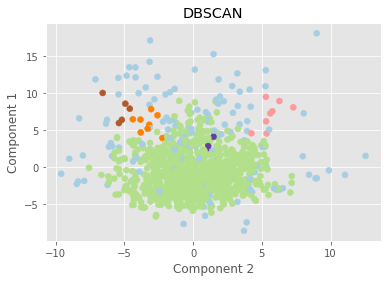

In [30]:
db_default = DBSCAN(eps = 3, min_samples = 5)
db_default.fit(sources_pca)
labels = db_default.labels_
x_axis = df_pca_kmeans_country['Component 2']
y_axis = df_pca_kmeans_country['Component 1']

 
plt.scatter(x_axis, y_axis,c=labels, cmap='Paired')
plt.xlabel("Component 2")
plt.ylabel("Component 1")
plt.title("DBSCAN")

In [31]:
df_pca_kmeans_country['Cluster_DBSCAN'] = labels
df_pca_kmeans_country.head()

,0,1,2,3,4,5,6,7,8,9,...,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Segment K Means,Cluster,country,Cluster_DBSCAN
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.068725,8.437277,5.197233,8.031615,5.961685,1.251471,0,first,Brazil,-1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.190528,0.862663,0.072848,2.825877,-0.648774,-0.942471,0,first,Cape Verde,0
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,4.149918,-1.397989,-2.099783,0.745883,-2.962628,0.922777,1,second,Mali,0
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.947960,4.093904,2.281609,-0.324628,-1.668110,1.756620,0,first,Ethiopia,0
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,0.366876,-1.564429,0.080290,2.907161,0.253168,-0.757588,0,first,Morocco,0


### Percentage of songs that belong to each cluster

In [32]:
get_clusters_dbscan(df_pca_kmeans_country)

-----------
-1
-----------
Brazil   0.06
Uzbekistan   0.06
India   0.09
Lithuania   0.25
Romania   0.16
United Kingdom   0.36
Turkey   0.08
Myanmar   0.24
Thailand   0.26
Indonesia   0.24
Kenya   0.22
Iran   0.22
Belize   0.27
Cape Verde   0.06
Australia   0.43
Japan   0.32
Georgia   0.1
China   0.33
Senegal   0.12
Greece   0.09
Pakistan   0.11
Mali   0.09
Kyrgyzstan   0.15
Italy   0.08
Morocco   0.06
Egypt   0.06
Albania   0.05
Cambodia   0.07
Algeria   0.03
-----------
0
-----------
Cape Verde   0.94
Mali   0.91
Ethiopia   0.97
Morocco   0.94
Senegal   0.88
United Kingdom   0.64
Uzbekistan   0.94
Italy   0.92
Pakistan   0.89
Romania   0.84
Algeria   0.97
Turkey   0.91
Thailand   0.67
China   0.65
Taiwan   1.0
Indonesia   0.76
Jamaica   1.0
Iran   0.78
Egypt   0.94
India   0.91
Kyrgyzstan   0.85
Kenya   0.75
Greece   0.89
Brazil   0.94
Australia   0.57
Japan   0.68
Belize   0.73
Tanzania   1.0
Georgia   0.9
Cambodia   0.71
Albania   0.9
Lithuania   0.62
Myanmar   0.36
-----------
3
--

## Reducing Dimensionality Using T-SNE

In [33]:
df_countries.head()
df_tsne = df_countries

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_x)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1059 samples in 0.004s...
[t-SNE] Computed neighbors for 1059 samples in 0.163s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1059
[t-SNE] Computed conditional probabilities for sample 1059 / 1059
[t-SNE] Mean sigma: 2.480862
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.578766
[t-SNE] KL divergence after 300 iterations: 1.553138


## Are there any clusters occuring among countries?

Text(0.5, 1.0, 'Visualizing t-sne Components by Countries')

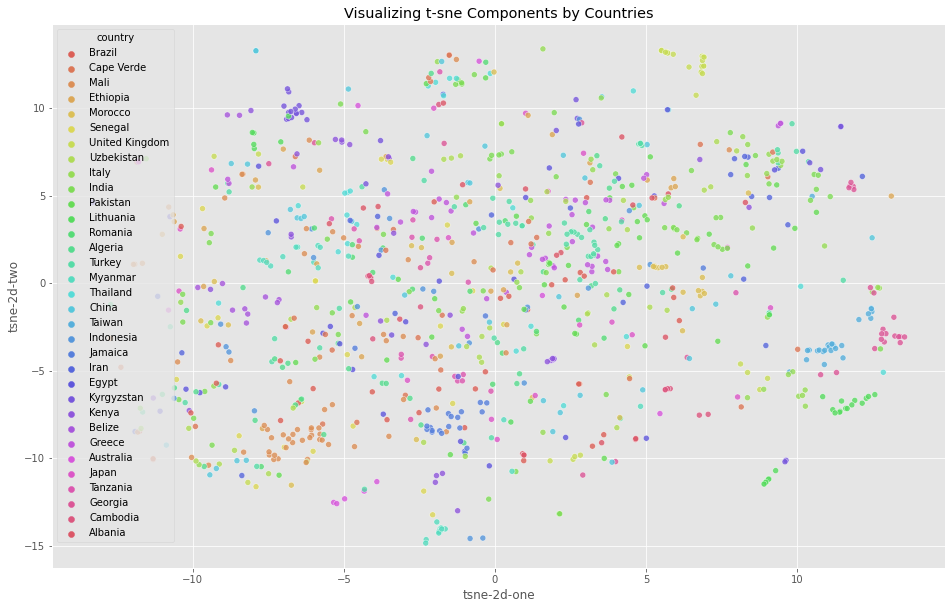

In [115]:
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
#sns.set_palette("bright")
#sns.palplot(sns.color_palette() )
#sns.palplot(sns.color_palette(n_colors=33) )

# but setting the number of colors explicitly allows it to use them all
#sns.set_palette(cmap, n_colors=33)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="country",
    palette=sns.color_palette("hls", 33),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title("Visualizing t-sne Components by Countries")

## Are there any clusters occuring among Continents?

Text(0.5, 1.0, 'Visualizing t-sne components by Continents')

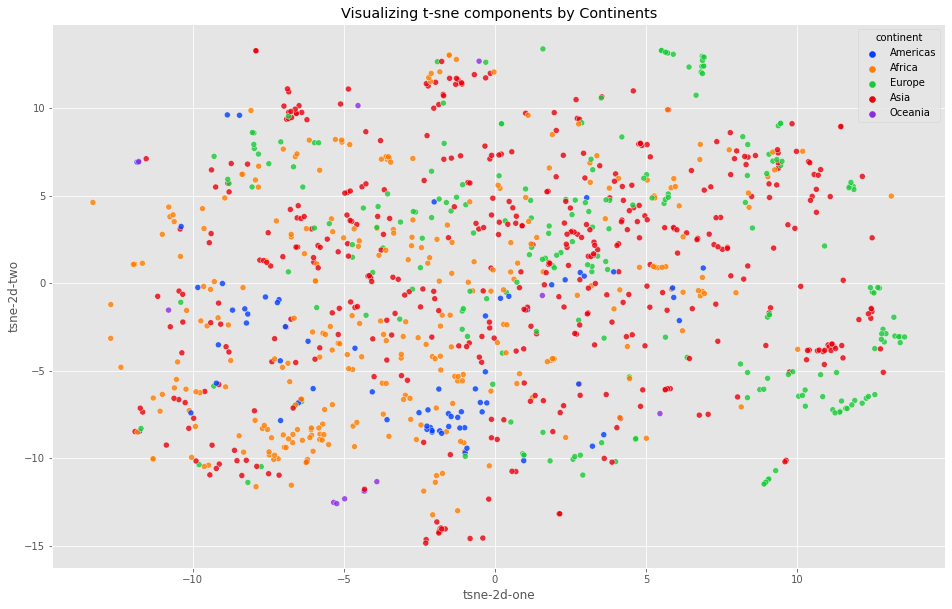

In [106]:
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="continent",
    palette=sns.color_palette("bright", 5),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title("Visualizing t-sne components by Continents")

## Are there any clusters occuring among Regions?

Text(0.5, 1.0, 'Visualizing t-sne Components by Regions')

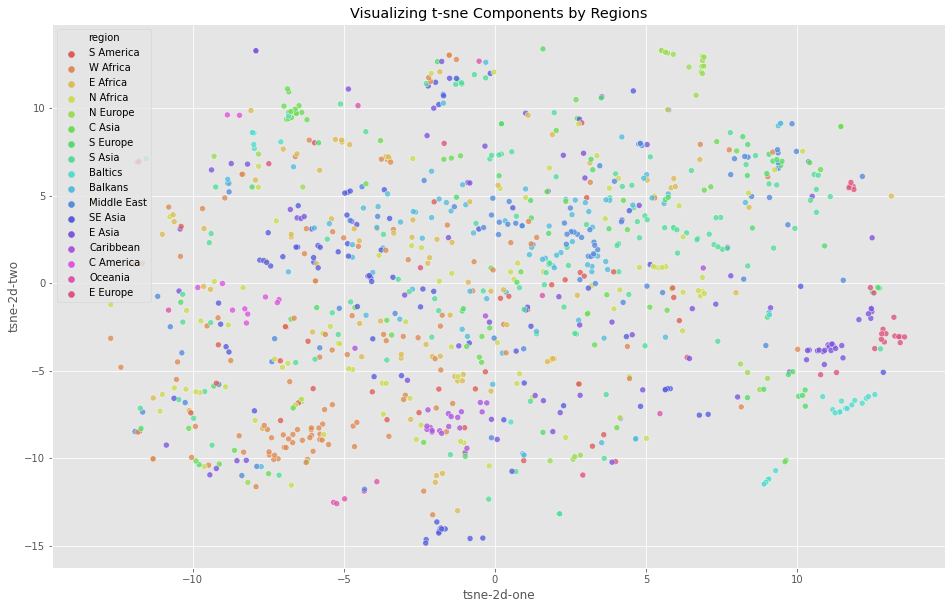

In [107]:
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="region",
    palette=sns.color_palette("hls", 17),
    data=df_tsne,
    legend="full",
    alpha=0.8
)
plt.title("Visualizing t-sne Components by Regions")

## K-Means with 6 clusters 

In [41]:
kmeans_tsne = KMeans(n_clusters = 6, init = 'k-means++', random_state = 47)
kmeans_tsne.fit(tsne_results)
df_countries['Segment K Means'] = kmeans_tsne.labels_
df_countries.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,lat,long,country,continent,region,tsne-2d-one,tsne-2d-two,Segment K Means
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-15.75,-47.95,-15.75,-47.95,Brazil,Americas,S America,-11.764237,-8.464561,1
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,14.91,-23.51,14.91,-23.51,Cape Verde,Africa,W Africa,-5.703125,-8.047065,1
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,12.65,-8.00,12.65,-8.00,Mali,Africa,W Africa,-3.903850,3.125319,3
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,9.03,38.74,9.03,38.74,Ethiopia,Africa,E Africa,-7.697103,-8.300613,1
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,34.03,-6.85,34.03,-6.85,Morocco,Africa,N Africa,0.167015,5.411992,0


/Users/kaavyagowthaman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


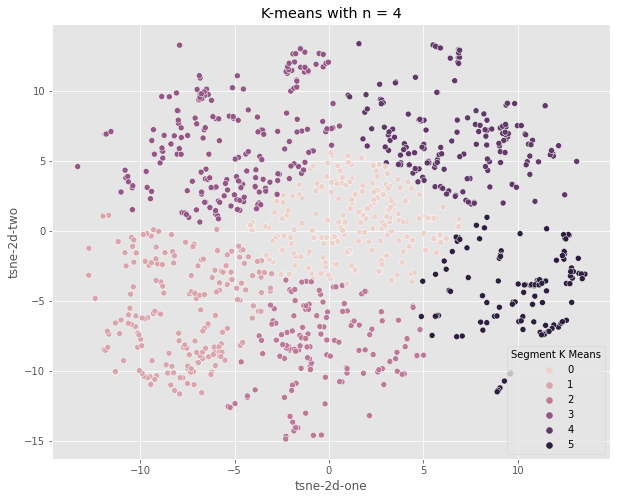

In [44]:
x_axis = df_countries['tsne-2d-one']
y_axis = df_countries['tsne-2d-two']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_countries['Segment K Means'])
plt.title('K-means with n = 6')
plt.show()

/Users/kaavyagowthaman/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


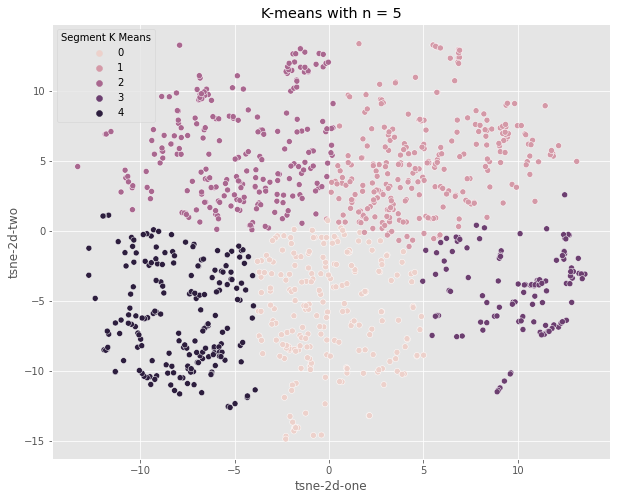

In [55]:
kmeans_tsne = KMeans(n_clusters = 5, init = 'k-means++', random_state = 47)
kmeans_tsne.fit(tsne_results)
df_countries['Segment K Means'] = kmeans_tsne.labels_
df_countries.head()
x_axis = df_tsne['tsne-2d-one']
y_axis = df_tsne['tsne-2d-two']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_countries['Segment K Means'])
plt.title('K-means with n = 5')
plt.show()

## DBSCAN

Text(0.5, 1.0, 'DBSCAN')

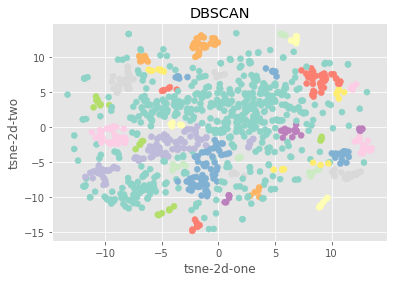

In [70]:
db_default = DBSCAN(eps = 0.8, min_samples = 5)
db_default.fit(tsne_results)
labels = db_default.labels_
x_axis = df_tsne['tsne-2d-one']
y_axis = df_tsne['tsne-2d-two']

 
plt.scatter(x_axis, y_axis,c=labels, cmap="Set3")
plt.xlabel("tsne-2d-one")
plt.ylabel("tsne-2d-two")
plt.title("DBSCAN")

## Agglomerative Clustering

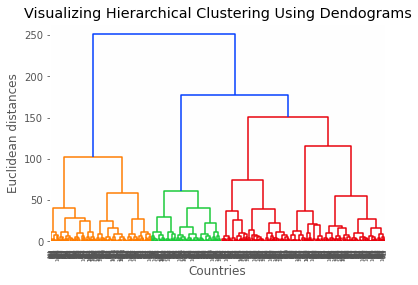

In [110]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(tsne_results, method  = "ward"))
plt.title('Visualizing Hierarchical Clustering Using Dendograms')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.show()

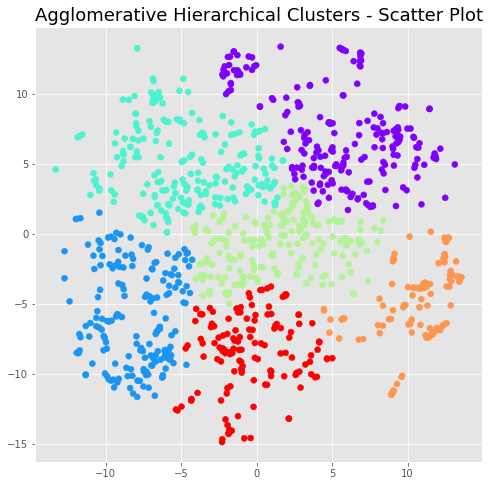

In [83]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters = 6)
df_tsne['cluster_agg'] = agc.fit_predict(tsne_results)
plt.figure(figsize =(8, 8))
plt.scatter(df_tsne['tsne-2d-one'], df_tsne['tsne-2d-two'], c = df_tsne['cluster_agg'], cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter", fontsize=18)
plt.show() 

In [86]:
def get_clusters_agg(df_tsne, label_by):
    clusters = {}
    countries = {}
    for index, row in df_tsne.iterrows():
        if row['cluster_agg'] not in clusters:
            clusters[row['cluster_agg']] = {}
        if row[label_by] in clusters[row['cluster_agg']]:
            clusters[row['cluster_agg']][row[label_by]] += 1
        else:
            clusters[row['cluster_agg']][row[label_by]] = 1
        #getting total country counts
        if row[label_by] in countries:
            countries[row[label_by]] += 1
        else:
            countries[row[label_by]] = 1

    for key in clusters:
        print("-----------")
        print(key)
        print("-----------")
        for k in clusters[key]:
            print(k, " ", round(((clusters[key][k])/countries[k]),2))
get_clusters_agg(df_tsne, label_by='country')

-----------
1
-----------
Brazil   0.28
Cape Verde   0.24
Ethiopia   0.17
Mali   0.64
Senegal   0.38
United Kingdom   0.06
Uzbekistan   0.25
Italy   0.12
Pakistan   0.09
Algeria   0.46
Turkey   0.14
Belize   0.82
Australia   0.14
Japan   0.05
Morocco   0.15
Romania   0.05
Indonesia   0.24
India   0.16
Kenya   0.09
Iran   0.17
Egypt   0.26
China   0.12
Thailand   0.04
Jamaica   0.05
Greece   0.02
-----------
2
-----------
Mali   0.17
Morocco   0.12
Romania   0.42
Ethiopia   0.4
Myanmar   0.48
Thailand   0.33
China   0.35
Indonesia   0.28
Senegal   0.29
Kyrgyzstan   0.62
Iran   0.13
Brazil   0.08
Cape Verde   0.21
Uzbekistan   0.11
Australia   0.21
Japan   0.21
Georgia   0.1
Egypt   0.19
Pakistan   0.06
Italy   0.12
Kenya   0.38
Greece   0.33
Tanzania   0.3
Lithuania   0.19
Turkey   0.23
India   0.17
Algeria   0.03
Albania   0.24
United Kingdom   0.09
Belize   0.18
-----------
0
-----------
Uzbekistan   0.19
United Kingdom   0.58
Turkey   0.22
Thailand   0.3
Taiwan   0.04
Pakistan   0.4


In [87]:
get_clusters_agg(df_tsne, label_by='continent')

-----------
1
-----------
Americas   0.29
Africa   0.31
Europe   0.04
Asia   0.11
Oceania   0.14
-----------
2
-----------
Africa   0.22
Europe   0.2
Asia   0.23
Americas   0.07
Oceania   0.21
-----------
0
-----------
Asia   0.26
Europe   0.29
Africa   0.12
Oceania   0.07
Americas   0.01
-----------
5
-----------
Asia   0.1
Europe   0.07
Americas   0.43
Africa   0.15
Oceania   0.43
-----------
4
-----------
Europe   0.25
Asia   0.1
Africa   0.01
Oceania   0.07
-----------
3
-----------
Europe   0.15
Asia   0.21
Africa   0.18
Americas   0.19
Oceania   0.07


In [88]:
get_clusters_agg(df_tsne, label_by='region')

-----------
1
-----------
S America   0.28
W Africa   0.48
E Africa   0.1
N Europe   0.06
C Asia   0.15
S Europe   0.12
S Asia   0.13
N Africa   0.29
Middle East   0.15
C America   0.82
Oceania   0.14
E Asia   0.07
Balkans   0.02
SE Asia   0.08
Caribbean   0.05
-----------
2
-----------
W Africa   0.2
N Africa   0.11
Balkans   0.33
E Africa   0.37
SE Asia   0.31
E Asia   0.21
C Asia   0.32
Middle East   0.21
S America   0.08
Oceania   0.21
E Europe   0.1
S Asia   0.13
S Europe   0.12
Baltics   0.19
N Europe   0.09
C America   0.18
-----------
0
-----------
C Asia   0.23
N Europe   0.58
Middle East   0.29
SE Asia   0.12
E Asia   0.15
S Asia   0.44
S Europe   0.41
E Africa   0.13
Balkans   0.23
Oceania   0.07
E Europe   0.21
N Africa   0.15
W Africa   0.09
S America   0.03
-----------
5
-----------
S Asia   0.07
Balkans   0.09
SE Asia   0.21
Caribbean   0.86
N Africa   0.17
E Africa   0.22
S America   0.31
C Asia   0.06
Oceania   0.43
W Africa   0.1
E Asia   0.11
E Europe   0.07
N Europe

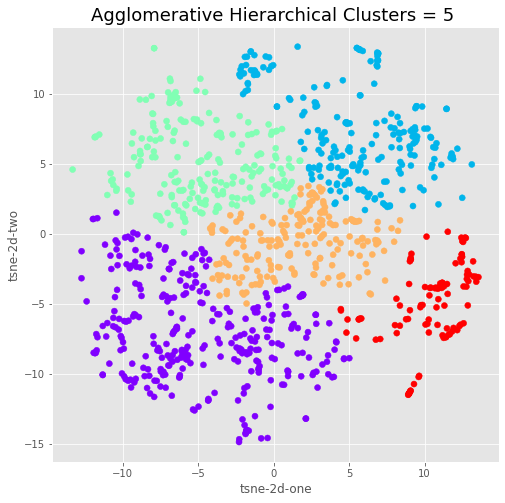

In [111]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters = 5)
df_tsne['cluster_agg'] = agc.fit_predict(tsne_results)
plt.figure(figsize =(8, 8))
plt.scatter(df_tsne['tsne-2d-one'], df_tsne['tsne-2d-two'], c = df_tsne['cluster_agg'], cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters = 5 ", fontsize=18)
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show() 

In [90]:
get_clusters_agg(df_tsne, label_by='country')

-----------
0
-----------
Brazil   0.58
Cape Verde   0.32
Ethiopia   0.17
Mali   0.71
Senegal   0.54
United Kingdom   0.18
Uzbekistan   0.36
Italy   0.16
India   0.23
Pakistan   0.15
Romania   0.16
Algeria   0.66
Turkey   0.2
Myanmar   0.48
Indonesia   0.36
Jamaica   0.91
Egypt   0.48
Kenya   0.47
Belize   0.82
Australia   0.57
Japan   0.26
Tanzania   0.3
Morocco   0.24
Thailand   0.19
China   0.25
Iran   0.17
Albania   0.29
Georgia   0.07
Greece   0.02
Lithuania   0.03
-----------
2
-----------
Mali   0.17
Morocco   0.12
Romania   0.42
Ethiopia   0.4
Myanmar   0.48
Thailand   0.33
China   0.35
Indonesia   0.28
Senegal   0.29
Kyrgyzstan   0.62
Iran   0.13
Brazil   0.08
Cape Verde   0.21
Uzbekistan   0.11
Australia   0.21
Japan   0.21
Georgia   0.1
Egypt   0.19
Pakistan   0.06
Italy   0.12
Kenya   0.38
Greece   0.33
Tanzania   0.3
Lithuania   0.19
Turkey   0.23
India   0.17
Algeria   0.03
Albania   0.24
United Kingdom   0.09
Belize   0.18
-----------
1
-----------
Uzbekistan   0.19
Unit

In [91]:
get_clusters_agg(df_tsne, label_by='continent')

-----------
0
-----------
Americas   0.72
Africa   0.47
Europe   0.12
Asia   0.21
Oceania   0.57
-----------
2
-----------
Africa   0.22
Europe   0.2
Asia   0.23
Americas   0.07
Oceania   0.21
-----------
1
-----------
Asia   0.26
Europe   0.29
Africa   0.12
Oceania   0.07
Americas   0.01
-----------
4
-----------
Europe   0.25
Asia   0.1
Africa   0.01
Oceania   0.07
-----------
3
-----------
Europe   0.15
Asia   0.21
Africa   0.18
Americas   0.19
Oceania   0.07


In [92]:
get_clusters_agg(df_tsne, label_by='region')

-----------
0
-----------
S America   0.58
W Africa   0.57
E Africa   0.32
N Europe   0.18
C Asia   0.21
S Europe   0.16
S Asia   0.2
Balkans   0.12
N Africa   0.46
Middle East   0.2
SE Asia   0.29
Caribbean   0.91
C America   0.82
Oceania   0.57
E Asia   0.18
E Europe   0.07
Baltics   0.03
-----------
2
-----------
W Africa   0.2
N Africa   0.11
Balkans   0.33
E Africa   0.37
SE Asia   0.31
E Asia   0.21
C Asia   0.32
Middle East   0.21
S America   0.08
Oceania   0.21
E Europe   0.1
S Asia   0.13
S Europe   0.12
Baltics   0.19
N Europe   0.09
C America   0.18
-----------
1
-----------
C Asia   0.23
N Europe   0.58
Middle East   0.29
SE Asia   0.12
E Asia   0.15
S Asia   0.44
S Europe   0.41
E Africa   0.13
Balkans   0.23
Oceania   0.07
E Europe   0.21
N Africa   0.15
W Africa   0.09
S America   0.03
-----------
4
-----------
Baltics   0.78
SE Asia   0.1
E Asia   0.32
S Europe   0.24
W Africa   0.02
Oceania   0.07
N Europe   0.15
E Europe   0.55
Middle East   0.03
C Asia   0.03
S Asia 

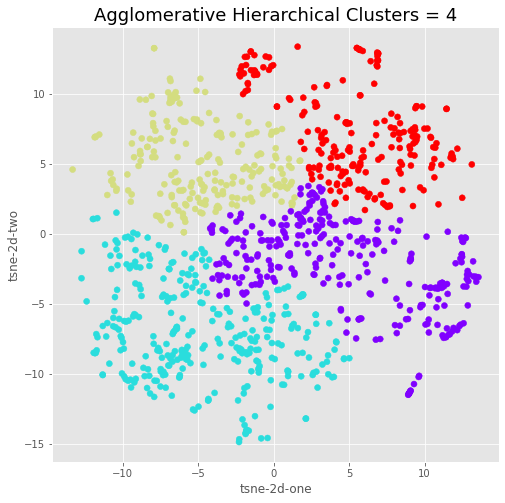

In [112]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters = 4)
df_tsne['cluster_agg'] = agc.fit_predict(tsne_results)
plt.figure(figsize =(8, 8))
plt.scatter(df_tsne['tsne-2d-one'], df_tsne['tsne-2d-two'], c = df_tsne['cluster_agg'], cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters = 4", fontsize=18)
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show() 

In [94]:
get_clusters_agg(df_tsne, label_by='country')

-----------
1
-----------
Brazil   0.58
Cape Verde   0.32
Ethiopia   0.17
Mali   0.71
Senegal   0.54
United Kingdom   0.18
Uzbekistan   0.36
Italy   0.16
India   0.23
Pakistan   0.15
Romania   0.16
Algeria   0.66
Turkey   0.2
Myanmar   0.48
Indonesia   0.36
Jamaica   0.91
Egypt   0.48
Kenya   0.47
Belize   0.82
Australia   0.57
Japan   0.26
Tanzania   0.3
Morocco   0.24
Thailand   0.19
China   0.25
Iran   0.17
Albania   0.29
Georgia   0.07
Greece   0.02
Lithuania   0.03
-----------
2
-----------
Mali   0.17
Morocco   0.12
Romania   0.42
Ethiopia   0.4
Myanmar   0.48
Thailand   0.33
China   0.35
Indonesia   0.28
Senegal   0.29
Kyrgyzstan   0.62
Iran   0.13
Brazil   0.08
Cape Verde   0.21
Uzbekistan   0.11
Australia   0.21
Japan   0.21
Georgia   0.1
Egypt   0.19
Pakistan   0.06
Italy   0.12
Kenya   0.38
Greece   0.33
Tanzania   0.3
Lithuania   0.19
Turkey   0.23
India   0.17
Algeria   0.03
Albania   0.24
United Kingdom   0.09
Belize   0.18
-----------
3
-----------
Uzbekistan   0.19
Unit

In [95]:
get_clusters_agg(df_tsne, label_by='continent')

-----------
1
-----------
Americas   0.72
Africa   0.47
Europe   0.12
Asia   0.21
Oceania   0.57
-----------
2
-----------
Africa   0.22
Europe   0.2
Asia   0.23
Americas   0.07
Oceania   0.21
-----------
3
-----------
Asia   0.26
Europe   0.29
Africa   0.12
Oceania   0.07
Americas   0.01
-----------
0
-----------
Europe   0.4
Asia   0.3
Africa   0.19
Oceania   0.14
Americas   0.19


In [96]:
get_clusters_agg(df_tsne, label_by='region')

-----------
1
-----------
S America   0.58
W Africa   0.57
E Africa   0.32
N Europe   0.18
C Asia   0.21
S Europe   0.16
S Asia   0.2
Balkans   0.12
N Africa   0.46
Middle East   0.2
SE Asia   0.29
Caribbean   0.91
C America   0.82
Oceania   0.57
E Asia   0.18
E Europe   0.07
Baltics   0.03
-----------
2
-----------
W Africa   0.2
N Africa   0.11
Balkans   0.33
E Africa   0.37
SE Asia   0.31
E Asia   0.21
C Asia   0.32
Middle East   0.21
S America   0.08
Oceania   0.21
E Europe   0.1
S Asia   0.13
S Europe   0.12
Baltics   0.19
N Europe   0.09
C America   0.18
-----------
3
-----------
C Asia   0.23
N Europe   0.58
Middle East   0.29
SE Asia   0.12
E Asia   0.15
S Asia   0.44
S Europe   0.41
E Africa   0.13
Balkans   0.23
Oceania   0.07
E Europe   0.21
N Africa   0.15
W Africa   0.09
S America   0.03
-----------
0
-----------
Baltics   0.78
Balkans   0.33
SE Asia   0.29
E Asia   0.45
N Africa   0.27
S Europe   0.31
W Africa   0.14
C Asia   0.24
Oceania   0.14
N Europe   0.15
E Europe  

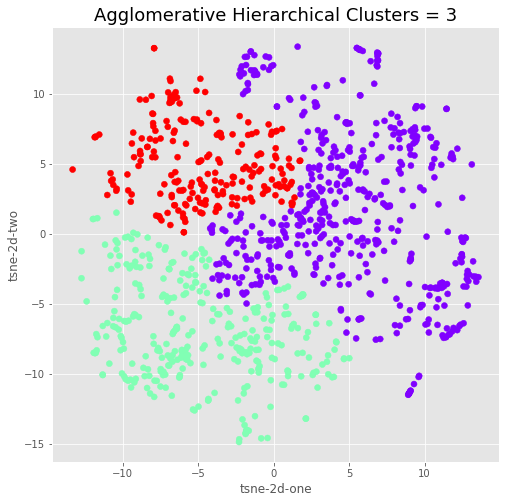

In [113]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters = 3)
df_tsne['cluster_agg'] = agc.fit_predict(tsne_results)
plt.figure(figsize =(8, 8))
plt.scatter(df_tsne['tsne-2d-one'], df_tsne['tsne-2d-two'], c = df_tsne['cluster_agg'], cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters = 3", fontsize=18)
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show() 

In [98]:
get_clusters_agg(df_tsne, label_by='country')

-----------
1
-----------
Brazil   0.58
Cape Verde   0.32
Ethiopia   0.17
Mali   0.71
Senegal   0.54
United Kingdom   0.18
Uzbekistan   0.36
Italy   0.16
India   0.23
Pakistan   0.15
Romania   0.16
Algeria   0.66
Turkey   0.2
Myanmar   0.48
Indonesia   0.36
Jamaica   0.91
Egypt   0.48
Kenya   0.47
Belize   0.82
Australia   0.57
Japan   0.26
Tanzania   0.3
Morocco   0.24
Thailand   0.19
China   0.25
Iran   0.17
Albania   0.29
Georgia   0.07
Greece   0.02
Lithuania   0.03
-----------
2
-----------
Mali   0.17
Morocco   0.12
Romania   0.42
Ethiopia   0.4
Myanmar   0.48
Thailand   0.33
China   0.35
Indonesia   0.28
Senegal   0.29
Kyrgyzstan   0.62
Iran   0.13
Brazil   0.08
Cape Verde   0.21
Uzbekistan   0.11
Australia   0.21
Japan   0.21
Georgia   0.1
Egypt   0.19
Pakistan   0.06
Italy   0.12
Kenya   0.38
Greece   0.33
Tanzania   0.3
Lithuania   0.19
Turkey   0.23
India   0.17
Algeria   0.03
Albania   0.24
United Kingdom   0.09
Belize   0.18
-----------
0
-----------
Uzbekistan   0.53
Lith

In [99]:
get_clusters_agg(df_tsne, label_by='continent')

-----------
1
-----------
Americas   0.72
Africa   0.47
Europe   0.12
Asia   0.21
Oceania   0.57
-----------
2
-----------
Africa   0.22
Europe   0.2
Asia   0.23
Americas   0.07
Oceania   0.21
-----------
0
-----------
Asia   0.56
Europe   0.68
Africa   0.31
Oceania   0.21
Americas   0.2


In [100]:
get_clusters_agg(df_tsne, label_by='region')

-----------
1
-----------
S America   0.58
W Africa   0.57
E Africa   0.32
N Europe   0.18
C Asia   0.21
S Europe   0.16
S Asia   0.2
Balkans   0.12
N Africa   0.46
Middle East   0.2
SE Asia   0.29
Caribbean   0.91
C America   0.82
Oceania   0.57
E Asia   0.18
E Europe   0.07
Baltics   0.03
-----------
2
-----------
W Africa   0.2
N Africa   0.11
Balkans   0.33
E Africa   0.37
SE Asia   0.31
E Asia   0.21
C Asia   0.32
Middle East   0.21
S America   0.08
Oceania   0.21
E Europe   0.1
S Asia   0.13
S Europe   0.12
Baltics   0.19
N Europe   0.09
C America   0.18
-----------
0
-----------
C Asia   0.47
Baltics   0.78
Balkans   0.56
N Europe   0.73
Middle East   0.6
SE Asia   0.41
E Asia   0.61
S Asia   0.67
N Africa   0.42
S Europe   0.73
E Africa   0.32
W Africa   0.23
Oceania   0.21
E Europe   0.83
S America   0.33
Caribbean   0.09


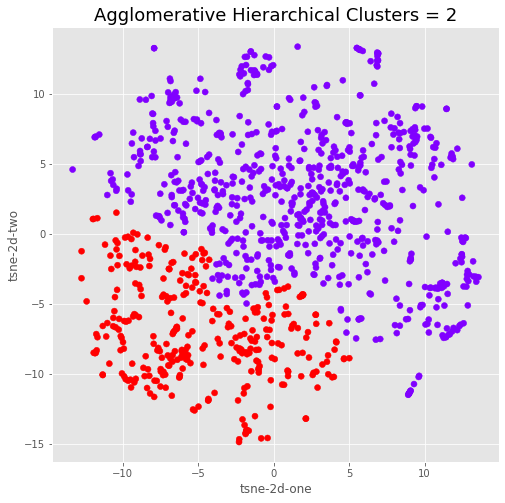

In [114]:
from sklearn.cluster import AgglomerativeClustering 
agc = AgglomerativeClustering(n_clusters = 2)
df_tsne['cluster_agg'] = agc.fit_predict(tsne_results)
plt.figure(figsize =(8, 8))
plt.scatter(df_tsne['tsne-2d-one'], df_tsne['tsne-2d-two'], c = df_tsne['cluster_agg'], cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters = 2", fontsize=18)
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.show() 

In [102]:
get_clusters_agg(df_tsne, label_by='country')

-----------
1
-----------
Brazil   0.58
Cape Verde   0.32
Ethiopia   0.17
Mali   0.71
Senegal   0.54
United Kingdom   0.18
Uzbekistan   0.36
Italy   0.16
India   0.23
Pakistan   0.15
Romania   0.16
Algeria   0.66
Turkey   0.2
Myanmar   0.48
Indonesia   0.36
Jamaica   0.91
Egypt   0.48
Kenya   0.47
Belize   0.82
Australia   0.57
Japan   0.26
Tanzania   0.3
Morocco   0.24
Thailand   0.19
China   0.25
Iran   0.17
Albania   0.29
Georgia   0.07
Greece   0.02
Lithuania   0.03
-----------
0
-----------
Mali   0.29
Morocco   0.76
Uzbekistan   0.64
Lithuania   0.97
Romania   0.84
United Kingdom   0.82
Ethiopia   0.83
Turkey   0.8
Myanmar   0.52
Thailand   0.81
China   0.75
Taiwan   1.0
Indonesia   0.64
Pakistan   0.85
Iran   0.83
Senegal   0.46
India   0.77
Kyrgyzstan   1.0
Italy   0.84
Kenya   0.53
Greece   0.98
Brazil   0.42
Cape Verde   0.68
Australia   0.43
Japan   0.74
Georgia   0.93
Tanzania   0.7
Cambodia   1.0
Albania   0.71
Egypt   0.52
Algeria   0.34
Belize   0.18
Jamaica   0.09


In [103]:
get_clusters_agg(df_tsne, label_by='continent')

-----------
1
-----------
Americas   0.72
Africa   0.47
Europe   0.12
Asia   0.21
Oceania   0.57
-----------
0
-----------
Africa   0.53
Asia   0.79
Europe   0.88
Americas   0.28
Oceania   0.43


In [104]:
get_clusters_agg(df_tsne, label_by='region')

-----------
1
-----------
S America   0.58
W Africa   0.57
E Africa   0.32
N Europe   0.18
C Asia   0.21
S Europe   0.16
S Asia   0.2
Balkans   0.12
N Africa   0.46
Middle East   0.2
SE Asia   0.29
Caribbean   0.91
C America   0.82
Oceania   0.57
E Asia   0.18
E Europe   0.07
Baltics   0.03
-----------
0
-----------
W Africa   0.43
N Africa   0.54
C Asia   0.79
Baltics   0.97
Balkans   0.88
N Europe   0.82
E Africa   0.68
Middle East   0.8
SE Asia   0.71
E Asia   0.82
S Asia   0.8
S Europe   0.84
S America   0.42
Oceania   0.43
E Europe   0.93
C America   0.18
Caribbean   0.09
